# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from apikeys import apikey
apikey = f'&APPID={apikey}'


#base url for API call
url = 'http://api.openweathermap.org/data/2.5/weather?q='

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print("Step complete!")

Step complete!


## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [30]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(f"Step complete! You collected lat/long info for {len(cities)} cities.")

Step complete! You collected lat/long info for 626 cities.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
#Create lists for the DF
New_Cities = []
Clouds = []
Dates = []
Humidities = []
Latitudes = []
Longitudes = []
Max_Temps = []
Wind_Speeds = []
Countries = []

#Set Counters
count_one = 0
set_one = 1

#Loops through to make DF columns & logger
for city in cities:
    try:
        response = requests.get(url + city + apikey).json()
        Clouds.append(response['clouds']['all'])
        Countries.append(response['sys']['country'])
        Dates.append(response['dt'])
        Humidities.append(response['main']['humidity'])
        Latitudes.append(response['coord']['lat'])
        Longitudes.append(response['coord']['lon'])
        Max_Temps.append(response['main']['temp_max'])
        Wind_Speeds.append(response['wind']['speed'])
        
        if count_one > 48:
            count_one = 1
            set_one += 1
            New_Cities.append(city)
        else:
            count_one += 1
            New_Cities.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Processing Record 1 of Set 1 | tevriz
Processing Record 2 of Set 1 | henties bay
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | vestmannaeyjar
Processing Record 5 of Set 1 | vostok
City not found. Skipping...
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | cayenne
City not found. Skipping...
Processing Record 8 of Set 1 | sur
Processing Record 9 of Set 1 | maltahohe
Processing Record 10 of Set 1 | los llanos de aridane
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | naliya
Processing Record 15 of Set 1 | vardo
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | kirakira
Processing Record 19 of Set 1 | chernyshevskiy
Processing Record 20 of Set 1 | westport
Processing Record 21 of Set 1 | dakar
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# Create the DF
WeatherDF = pd.DataFrame({'City': New_Cities,
                          'Cloudiness': Clouds,
                          'Country': Countries,
                          'Date' : Dates,
                          'Humidity': Humidities,
                          'Lat': Latitudes,'Lng': Longitudes,
                          'Max Temp': Max_Temps,
                          'Wind Speed': Wind_Speeds})

# Preview DF
WeatherDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tevriz,100,RU,1571195566,95,57.51,72.40,278.20,1.076
1,henties bay,0,NA,1571195566,90,-22.12,14.28,289.26,1.340
2,cabo san lucas,20,MX,1571195566,83,22.89,-109.91,300.37,1.500
3,vestmannaeyjar,100,IS,1571195567,92,63.44,-20.27,282.00,8.856
4,vostok,0,RU,1571195567,52,46.45,135.83,275.00,6.476


In [33]:
# Convert temps to Fahrenheit
WeatherDF['Max Temp'] = (9 / 5) * (WeatherDF['Max Temp'] - 273) + 32

# Preview DF
WeatherDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tevriz,100,RU,1571195566,95,57.51,72.40,41.360,1.076
1,henties bay,0,NA,1571195566,90,-22.12,14.28,61.268,1.340
2,cabo san lucas,20,MX,1571195566,83,22.89,-109.91,81.266,1.500
3,vestmannaeyjar,100,IS,1571195567,92,63.44,-20.27,48.200,8.856
4,vostok,0,RU,1571195567,52,46.45,135.83,35.600,6.476


In [34]:
# Print output data to csv
WeatherDF.to_csv(output_data_file, index_label= 'City_ID')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

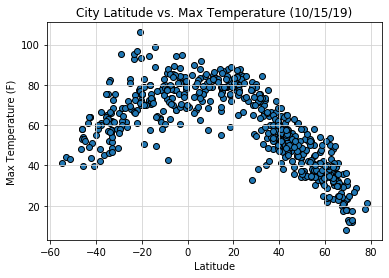

In [35]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Max Temp"], edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True, linestyle="-", color="lightgrey")
plt.savefig("Latitude vs Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

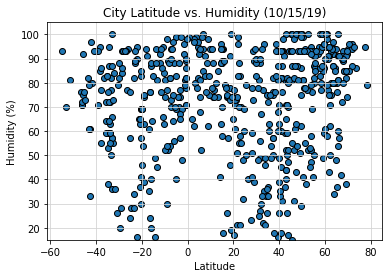

In [36]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Humidity"], edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15, 105)
plt.grid (b=True, linestyle="-", color="lightgrey")
plt.savefig("Latitude vs Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

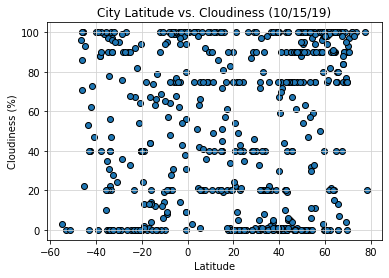

In [39]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Cloudiness"], edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True, linestyle="-", color="lightgrey")
plt.savefig("Latitude vs Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

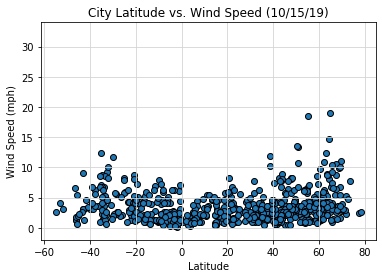

In [38]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Wind Speed"], edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2, 34)
plt.grid (b=True, linestyle="-", color="lightgrey")
plt.savefig("Latitude vs WindSpeed.png")
plt.show()